In [1]:
import numpy as np
import math

In [2]:
class KM():
    def __init__(self, k, vecs, max_iters=1000):
        self.k =k
        self.vecs = vecs
        self.labels = np.array([([-1]*self.vecs.shape[0])])
        self.centroids = np.random.uniform(size= (self.k, self.vecs.shape[1])) 
        self.iterations = 0
        self.max_iters = max_iters
        
    def distance(self, a, b):
        return np.sum((a-b)**2)
                
    def assign_clusters(self):
        for id_vec, vec in enumerate(self.vecs):
            min_ = float("inf")
            for id_cent , cent in enumerate(self.centroids):
                
                dist = self.distance(vec, cent)
                
                if dist < min_:
                    min_ = dist
                    self.labels[0][id_vec] = id_cent
                    
    def new_centroids(self):
        for k in range(self.k):
            self.centroids[k] = np.mean( self.vecs[k==np.squeeze(self.labels.T)], axis=0)
            assert (self.vecs[0].shape) == (self.centroids[k].shape)
            
    def fit(self):
        while self.iterations < self.max_iters:
            before = np.array([([-1]*self.vecs.shape[0])])
            before[:] =  self.labels[:]
            self.assign_clusters()
            self.new_centroids() 
            if list(before[0]) == list(self.labels[0]):
                break
            self.iterations+=1
            

In [3]:
test_vecs =  np.random.uniform(size=(1000, 2))
km = KM(10,test_vecs )
km.fit()



In [4]:
km.distance(test_vecs[0], km.centroids[0])
a = test_vecs[0]
b = km.centroids[0]
np.sum((a - b)**2)

0.1343315625475263

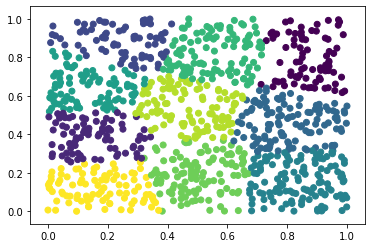

In [5]:
import matplotlib.pyplot as plt
plt.scatter(test_vecs[:,0], test_vecs[:,1], c=np.squeeze(km.labels))

In [8]:
np.mean(km.vecs[1 == np.squeeze(km.labels.T)],axis =0)

array([0.15133113, 0.38877756])